In [1]:
# !pip install -U nltk #natural language toolkit

### Import libraries/modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import re
import string
from string import punctuation 

from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

/home/ifeoma/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


### Load the dataset

In [2]:
train = pd.read_csv("Train.csv")
train.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [5]:
y=train.type.value_counts().to_frame()
y.head()

,type
sexual_violence,32648
Physical_violence,5946
emotional_violence,651
economic_violence,217
Harmful_Traditional_practice,188


In [6]:
test = pd.read_csv("Test.csv")
test.head()

,Tweet_ID,tweet
0,ID_0095QL4S,"because he was my boyfriend, and if I said no,..."
1,ID_00DREW5O,"lol no, I'm telling you it's not legal. It's l..."
2,ID_00E9F5X9,Somalia's semi-autonomous Puntland region has ...
3,ID_00G9OSKZ,University of Cape Coast students being robbed...
4,ID_00HU96U6,"""Somebody came up behind him and stabbed him i..."


In [7]:
print(train.shape,test.shape)

(39650, 3) (15581, 2)


### EDA

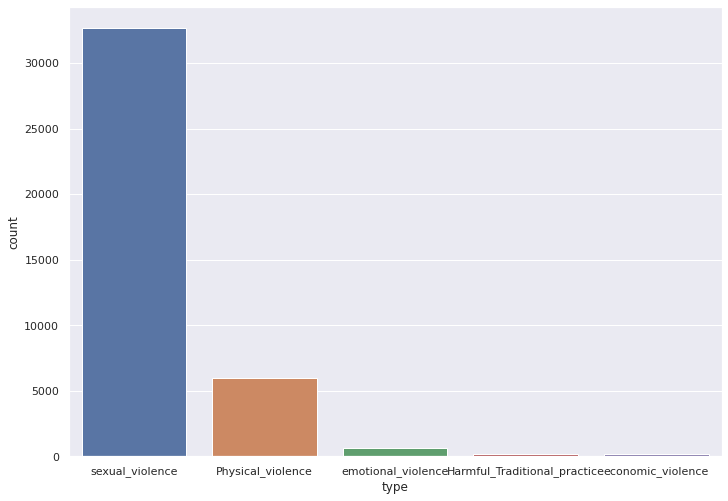

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(train["type"])
plt.show()

In [9]:
train.drop("type",axis=1)

,Tweet_ID,tweet
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...
1,ID_00395QYM,he thought the word raped means sex and told m...
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...
4,ID_004F7516,Chessy Prout can do better by telling the trut...
...,...,...
39645,ID_ZZTLP2L5,"ENTRY 1299: 21F. 23M, BF’s cousin. Got drunk o..."
39646,ID_ZZXB10M6,So you’re telling me Emmanuel Macron was groom...
39647,ID_ZZY8B7FJ,"My wife regularly beats me, I get dirty slaps ..."
39648,ID_ZZYAFD8L,Me: Hey babe! Police officer boyfriend: is tha...


This dataset is highly imbalanced; from the graphs above, sexual violence is about 80%+. 

In [10]:
train.isna().any() #check for null values in train set

Tweet_ID    False
tweet       False
type        False
dtype: bool

In [11]:
test.isna().any() #check for null values in test set

Tweet_ID    False
tweet       False
dtype: bool

In [14]:
#join train and test for easy preprocessing
train["trash"]=1
test["trash"]=0
all_data=pd.concat((train,test))
print(all_data.shape)
all_data.head()

(55231, 4)


,Tweet_ID,tweet,type,trash
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence,1
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence,1
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence,1
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence,1
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence,1


## Clean Text

In [65]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


def clean_text(text):
    
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    text = text.lower()
    text = re.sub(r'\$\w*', '', text)     
    text = re.sub(r'^RT[\s]+', '', text)    
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)     
    text   = re.sub(r'http?:.*$', '', text)
    text   = re.sub(r'https?:.*$', '', text)
    text = re.sub(r'#', '', text)     
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)
    text = re.sub(r'\\', '', text)
    text = re.sub(r"'", '', text)
    text = text.replace("'", " ").replace('"',"")
    text   = re.sub(r'pic?.*\/\w*', '', text)
    text   = re.sub(r'[' + string.punctuation + ']+', ' ', text)  
    
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(text)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  
            word not in string.punctuation): 
            stem_word = stemmer.stem(word)  
            tweets_clean.append(stem_word)

    return ' '.join(tweets_clean)

In [74]:
all_data['Tweets_clean']=all_data['tweet'].map(lambda X: clean_text(X))
all_data[1:15]

,Tweet_ID,tweet,type,trash,Tweets_clean
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence,1,thought word rape mean sex told “ saw dog rape...
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence,1,talk rape men molest jail nother charg say word
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence,1,sexual abus year age one believ rape bro ’ fri...
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence,1,chessi prout better tell truth sell owen labri...
5,ID_0052TYKI,"Yes men rape women. But women also rape men, y...",sexual_violence,1,ye men rape women women also rape men yet ’ ne...
6,ID_0058QG76,"My Husband Beats Me Frequently, Wife Tells Cou...",Physical_violence,1,husband beat frequent wife tell court
7,ID_005VM1DJ,Pretty sure he raped a 16yr old girl with 2 fr...,sexual_violence,1,pretti sure rape old girl friend buri aliv adm...
8,ID_0060BW8R,TW sorry to hear that and yeah he recently th...,sexual_violence,1,tw sorri hear yeah recent threaten file restra...
9,ID_007FAIEI,"""I understand that... My father was abusive as...",sexual_violence,1,understand father abus well rape mother harm o...
10,ID_00A89HJ5,but i would be here all night if i tried to te...,sexual_violence,1,would night tri tell everi aw detail main poin...
